# Pandas

## Pandas Objects

In the previous chapter we discussed the very basics of Python and NumPy. Here we go one step further and introduce the Pandas package and its data structures. At the very basic level, Pandas can be thought of as enhanced versions of NumPy arrays in which rows and columns come with labels (rather than simple integer indices). Pandas obviously provides more features than this, but it is important to first get an understanding of Pandas' data structure before delving into more advanced topics.

In [1]:
# We start by importing the NumPy, Pandas packages
import numpy as np
import pandas as pd

## Pandas Series

While a NumPy array has an *implicitly defined* index, Pandas allows for an *explicitly defined* index. That could mean strings or nonsequential indices. We first look at Pandas `Series` objects. These are one-dimensional arrays of indexed data. We can use lists or arrays to create it.

In [2]:
data = pd.Series([0.25, 0.5, 0.25, 1])
data

0    0.25
1    0.50
2    0.25
3    1.00
dtype: float64

In [3]:
data = pd.Series([0.25, 0.5, 0.25, 1], index=['w', 'x', 'y', 'z'])
data

w    0.25
x    0.50
y    0.25
z    1.00
dtype: float64

In [4]:
# Item access works as we would expect
data['x']

0.5

In [5]:
# Another example
data = pd.Series([0.25, 0.5, 0.75, 1],
                 index=[2, 7, 4, 1])
data

2    0.25
7    0.50
4    0.75
1    1.00
dtype: float64

In [6]:
data[2]

0.25

In [7]:
# Pandas series from NumPy array
vec = np.linspace(start=0.2, stop=1, num=5)
pd.Series(vec)

0    0.2
1    0.4
2    0.6
3    0.8
4    1.0
dtype: float64

NumPy array operations (as discussed in the previous chapter) such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link. 

## Pandas' Data Frames

### Constructing Data Frames

While Pandas' `Series` are comparable to a one-dimensional array with flexible indices, `DataFrame`s are comparable to two-dimensional arrays with both flexible row and column names.

In [8]:
data = {'Company': ['Schindler', 'ABB', 'GF', 'Sulzer'],
        'yrEndClose': [179.6, 21.48, 834, 105],
        'eps': [7.14, 0.87, 53, 1.73]}

comps = pd.DataFrame(data)
comps

,Company,yrEndClose,eps
0,Schindler,179.60,7.14
1,ABB,21.48,0.87
2,GF,834.00,53.00
3,Sulzer,105.00,1.73


In [9]:
data = [{'Company': 'Schindler', 'yrEndClose': 179.6, 'eps': 7.14},
        {'Company': 'ABB',  'yrEndClose': 21.48, 'eps': 0.87},
        {'Company': 'GF',  'yrEndClose': 834,  'eps': 53},
        {'Company': 'Sulzer',  'yrEndClose': 105,  'eps': 1.73}]
pd.DataFrame(data)

,Company,yrEndClose,eps
0,Schindler,179.60,7.14
1,ABB,21.48,0.87
2,GF,834.00,53.00
3,Sulzer,105.00,1.73


Ultimately, there are many more ways to create a `DataFrame` but we'll leave it with the above two examples. Reason being, as we will see later on, that data for a `DataFrame` is usually imported from a txt, csv or xls file. This process is fairly simple and will be discussed later on. Regarding `DataFrames`, check the excellent overview by [Chris Moffit (2016)](http://pbpython.com/pandas-list-dict.html) or see the help page `pd.DataFrame?` for more examples on how to create a `DataFrame`.

As we would expect, each `DataFrame` has some callable attributes.

In [10]:
print(comps.index)
print(comps.size, comps.shape, comps.ndim)

RangeIndex(start=0, stop=4, step=1)
12 (4, 3) 2


Working with data and adding new data columns is straight forward:

In [11]:
comps['PE'] = comps['yrEndClose'] / comps['eps']
comps['Year'] = 2016
comps

,Company,yrEndClose,eps,PE,Year
0,Schindler,179.60,7.14,25.154062,2016
1,ABB,21.48,0.87,24.689655,2016
2,GF,834.00,53.00,15.735849,2016
3,Sulzer,105.00,1.73,60.693642,2016


In [12]:
# Reorder columns
comps = comps[['Company', 'Year', 'PE', 'eps', 'yrEndClose']]
print(comps)

     Company  Year         PE    eps  yrEndClose
0  Schindler  2016  25.154062   7.14      179.60
1        ABB  2016  24.689655   0.87       21.48
2         GF  2016  15.735849  53.00      834.00
3     Sulzer  2016  60.693642   1.73      105.00


In [13]:
# Renaming columns
comps.columns = ['Company', 'Year', 'PE', 'EPS', 'Price']
comps.columns.values


array(['Company', 'Year', 'PE', 'EPS', 'Price'], dtype=object)

In [14]:
# Or renaming just one column
colNms = comps.columns.values
colNms[4] = 'yrEndClose'
comps.columns = colNms
comps.columns.values

array(['Company', 'Year', 'PE', 'EPS', 'yrEndClose'], dtype=object)

## Indexing and Selection

In the previous chapter we discussed how to access elements of NumPy arrays. In general, the same patterns are applicable to Pandas objects. However, there are a few quirks that we'll discuss to prevent confusion.

In [15]:
data = pd.Series([0, 1, 2], index=['a', 'b', 'c'])

# Adding a float
data['d'] = 2.5
data

a    0.0
b    1.0
c    2.0
d    2.5
dtype: float64

In [16]:
# Slicing by explicit index
data['a':'c']

a    0.0
b    1.0
c    2.0
dtype: float64

In [17]:
# Slicing by implicit index
data[0:2]

a    0.0
b    1.0
dtype: float64

**IMPORTANT:**

**Notice that when using the explicit index, the final index is *included*. On the other hand, when you use the implicit index (i.e. `data[0:2]`), the final index is *excluded*.**

Let's consider an example where the `Series` object has an explicit integer index.

In [18]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [19]:
# Explicit index when indexing
data[1]

'a'

In [20]:
# Implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

Because this was recognized as a source of confusion, Pandas introduced the `loc` and `iloc` attribute. `loc` allows indexing and slicing with the **explicit index**, `iloc` allows slicing that always references the **implicit index**.

In [21]:
data.loc[1]

'a'

In [22]:
data.loc[1:3]

1    a
3    b
dtype: object

In [23]:
data.iloc[1]

'b'

In [24]:
data.iloc[1:3]

3    b
5    c
dtype: object

Indexing for `DataFrame` works similar to what we discussed thus far.

In [25]:
comps[['Company', 'PE']]

,Company,PE
0,Schindler,25.154062
1,ABB,24.689655
2,GF,15.735849
3,Sulzer,60.693642


The index will always be shown. Thus if we reset the index such that the company names represent the index, then we could simply use `comps['PE']`.

In [26]:
compsInd = comps.set_index('Company')
print(compsInd)

           Year         PE    EPS  yrEndClose
Company                                      
Schindler  2016  25.154062   7.14      179.60
ABB        2016  24.689655   0.87       21.48
GF         2016  15.735849  53.00      834.00
Sulzer     2016  60.693642   1.73      105.00


In [27]:
compsInd['PE']

Company
Schindler    25.154062
ABB          24.689655
GF           15.735849
Sulzer       60.693642
Name: PE, dtype: float64

We can also use dot notation to access a column.

In [28]:
comps.EPS[:2]

0    7.14
1    0.87
Name: EPS, dtype: float64

One slicing option you might come across when studying python scripts is the `.ix` indexer. It is a hybrid of the two functions `.loc` and `.iloc`. However, the `.ix` indexer is deprecated in favor of the more strict `.iloc` and `.loc` and thus we won't discuss it here. 

## Index Alignment

Pandas will align indices in the process of performing operations for both `Series` as well as `DataFrame`s. This proves to be very convenient when dealing with incomplete data.

In [29]:
np.random.seed(1234)
A = pd.DataFrame(np.random.randint(low=10, high=99, size=(2,2)),
                 columns=['A', 'C'])
A

,A,C
0,57,93
1,48,63


In [30]:
B = pd.DataFrame(np.random.randint(low=0, high=10, size=(3,3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,8,9
1,1,7,9
2,6,8,0


In [31]:
A + B

,A,B,C
0,65.0,NaN,102.0
1,55.0,NaN,72.0
2,NaN,NaN,NaN


If we wish to fill the blanks with another value than `NaN`, we can do so by using the `add()` method and specify the `fill_value`.

In [32]:
A.add(B, fill_value=0)

,A,B,C
0,65.0,4.0,102.0
1,55.0,1.0,72.0
2,8.0,6.0,0.0


## Handling Missing Data

So far we have always dealt with complete data sets. Real world data, however, is hardly ever clean and homogeneous. Often data sets will have some amount of missing values. Further complicating the issue is the fact that different conventions exists to indicate missing data (`NaN`, `None`, `NA`, `null`, `-9999`).

Developers of NumPy and Pandas chose to use `NaN` (acronym for *Not a Number*) as missing data representation. Operations on `np.arrays`, `Series` or `DataFrames` containing `NaN` values are possible. However, one needs to keep in mind that any arithmetic operation with `NaN` will be another `NaN`.

In [33]:
val = np.array([0, np.nan, 1, 2])
val + 1

array([ 1., nan,  2.,  3.])

In [34]:
val * 0

array([ 0., nan,  0.,  0.])

NumPy provides special functions which can deal with `NaN` values.

In [35]:
print(val.sum(), val.min(), val.max())
print(np.nansum(val), np.nanmin(val), np.nanmax(val))

nan nan nan
3.0 0.0 2.0


While NumPy only accepts `np.nan`, Pandas is also able do handle `None` as input. Yet internally, Pandas will convert `None` values to `NaN`.

In [36]:
seq = pd.Series([1, np.nan, 2, None])
seq

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

But how do we deal with `NaN` values? Python provides some specific methods:

| **Method**   | **Description**                                                  |
|:------------:|------------------------------------------------------------------|
| `.isnull()`  | Generates boolean mask indicating missing values                 |
| `.notnull()` | Opposite of `.isnull()`                                          |
| `.dropna()`  | Returns a filtered version of the data                           |
| `.fillna()`  | Returns a copy of the data with missing values filled or imputed |

In [37]:
# Sample Series
ser = pd.Series([1, None, 2., np.nan])

# Boolean mask
print(ser.isnull())

# Sliced Series
print(ser[ser.notnull()])

0    False
1     True
2    False
3     True
dtype: bool
0    1.0
2    2.0
dtype: float64


In [38]:
# Create a DataFrame
df = pd.DataFrame(10 + np.arange(9).reshape(3, 3),
                  columns= ['A', 'B', 'C'])
df.iloc[0, 1] = np.nan; df.iloc[2, 0] = np.nan
df

,A,B,C
0,10.0,NaN,12
1,13.0,14.0,15
2,NaN,17.0,18


`.dropna()` can not drop single values, but it can drop full columns or rows. For this, the method takes the parameter `axis='rows'` or `axis='columns'`.

In [39]:
df.dropna()  # Similar to df.dropna(axis=0)

,A,B,C
1,13.0,14.0,15


In [40]:
df.dropna(axis='columns')  # similar to df.dropna(axis=1)

,C
0,12
1,15
2,18


Beyond the axis you can specify the parameter `how` and `thresh`. 

For parameter `how`, default is set to `how='any'` which means that any row or column (depending on your selection) with `NaN` values will be dropped. Alternatively you could set it to `how='all'` to remove only those rows/columns where all entries are of sort `NaN`.

For parameter `thresh`, default is set to `thresh=None`. For example setting a `thresh=3` will drop rows/columns with less than 3 non-null values. 

In [41]:
df['D'] = np.nan
df

,A,B,C,D
0,10.0,NaN,12,NaN
1,13.0,14.0,15,NaN
2,NaN,17.0,18,NaN


In [42]:
df.dropna(axis='columns', how='all')

,A,B,C
0,10.0,NaN,12
1,13.0,14.0,15
2,NaN,17.0,18


In [43]:
df.dropna(axis='rows', thresh=3)

,A,B,C,D
1,13.0,14.0,15,NaN


Sometimes it is also adequate to replace `NaN` cells with a specific value. For this method `.fillna()` is available.

In [44]:
df.fillna(value=-9999)

,A,B,C,D
0,10.0,-9999.0,12,-9999.0
1,13.0,14.0,15,-9999.0
2,-9999.0,17.0,18,-9999.0


In [45]:
# Forward-fill to propagate previous value forward
df.fillna(axis='rows', method='ffill')

,A,B,C,D
0,10.0,NaN,12,NaN
1,13.0,14.0,15,NaN
2,13.0,17.0,18,NaN


In [46]:
# Backward-fill to propagate previous value forward
df.fillna(axis='rows', method='bfill')

,A,B,C,D
0,10.0,14.0,12,NaN
1,13.0,14.0,15,NaN
2,NaN,17.0,18,NaN


## Combining Datasets

### Concat and Append

Concatenating, appending, merging or joining data sets is a deep (and some say 'dull') topic. Anyone who had the pleasure of learning relational algebra can tell. Pandas has four functions that will do the job for you and of which you should have heard:

* `pd.append()`
* `pd.concat()`
* `pd.merge()`
* `pd.join()`

From time to time one of these functions will appear in this course. However, we will not properly discuss these functions in any detail. Unfortunately, doing it would consume too much time and would be beyond the purpose of this course. Nonetheless, I recommend to spend 15min in learning the basics by reading through Pandas' intuitive introduction which can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html). It is kept fairly brief and with all the examples and visual representations, the functions are explained in a much better way than this tutorial could ever do. 

Another valuable resource is of course again Jake VanderPlas' Data Science Handbook. You might find his explanations and examples very helpful and since it's freely available on GitHub, why not give it a shot. [Here's the link (Combining Datasets)](https://github.com/jakevdp/PythonDataScienceHandbook). 

## Pandas Time Series

### Timestamps and Periods

Pandas was developed with a focus on financial data. It thus does not surprise that Pandas has incorporated an easy and reliable way of handling datetime formats. Pandas handling of date/time objects improves on the existing package `datetime` and NumPy's `numpy.datetime64` object and provides the necessary tools to efficiently handle datetimes. 

The most basic kind of time series object in Pandas are `pd.Series` or `pd.DataFrame` objects indexed with `timestamps`. 

In [47]:
# Simple Time Stamps
print(pd.Timestamp(day=31, year=2017, month=12))
print(pd.Timestamp(2017, 12, 31, 13, 8))
print(pd.Timestamp('10.03.2018 17:32:15'))
print(pd.Timestamp('31.03.2018 17:32:15'))
print(pd.Timestamp('2018-03-31'))
print(pd.Timestamp('2000-07'))
print(pd.to_datetime("1st of August, 1992"))

2017-12-31 00:00:00
2017-12-31 13:08:00
2018-10-03 17:32:15
2018-03-31 17:32:15
2018-03-31 00:00:00
2000-07-01 00:00:00
1992-08-01 00:00:00


Notice that `pd.Timestamp('10.03.2018')` is interpreted as 3rd of October 2018 while `pd.Timestamp('31.03.2018')` as 31st of March. Here it is important to realize that the default format is the American way of writing a date: 'mm.dd.yyyy'. 

Besides `pd.Timestamp` Pandas does also have a function for periods: `pd.Period`. The difference is subtle: The former is for a specific point in time, the latter represents a bounded interval. 

In [48]:
# Time Periods
Q3 = pd.Period('2017-09', freq='Q')
Q3

Period('2017Q3', 'Q-DEC')

In [49]:
M9 = pd.Period('2017-09', freq='M')
M9

Period('2017-09', 'M')

The `pd.Period` function has specific properties such as `start_time` and `end_time`.

In [50]:
Q3.start_time

Timestamp('2017-07-01 00:00:00')

In [51]:
M9.end_time

Timestamp('2017-09-30 23:59:59.999999999')

### Date Ranges

The command `pd.date_range` generates an index with indicated length according to a particular frequency.

In [52]:
pd.date_range(start='20180104', end='20180108')

DatetimeIndex(['2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
               '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

You could also pass just a start or end date combined with a number of periods to generate.

In [53]:
pd.date_range(start='2017-12-17', periods=2)

DatetimeIndex(['2017-12-17', '2017-12-18'], dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range(end='2017-09-30', periods=4)

DatetimeIndex(['2017-09-27', '2017-09-28', '2017-09-29', '2017-09-30'], dtype='datetime64[ns]', freq='D')

As became obvious from above examples, `pd.date_range` by default generates daily timestamps. If you wish another frequency - such as monthly, annual, etc. - you add the `freq=` argument to your command.

In [55]:
pd.date_range(end='2017-12-31', periods=4, freq='BQS')

DatetimeIndex(['2017-01-02', '2017-04-03', '2017-07-03', '2017-10-02'], dtype='datetime64[ns]', freq='BQS-JAN')

Here's an overview of Pandas frequency codes:

| **Code** | **Description**        || **Code**  | ** Description** |
|:--------:|------------------------||:---------:|------------------| 
| D        | Calendar day           ||  A        | Year end |
| B        | Business day           ||  AS       | Year start |
| W        | Weekly                 ||  BA       | Business year end |
| M        | Month end              ||  BAS      | Business year start |
| MS       | Month start            ||  H        | Hours |
| BM       | Business month end     ||  BH       | Business hours |
| BMS      | Business month start   ||  T        | Minutes |
| Q        | Quarter end            ||  S        | Seconds |
| QS       | Quarter start          ||  L        | Miliseconds |
| BQ       | Business quarter end   ||  U        | Microseconds |
| BQS      | Business quarter start ||  N        | Nanoseconds |















Beyond the above frequencies, Pandas has one more useful further option: "week of month". This enables you to
get dates like the third Friday of each month. Anyone dealing with options will recoginze these dates as the standard dates of monthly expiry.

In [56]:
# Third Friday of each month between Jan-18 and Sep-18
pd.date_range('2018-01-01', '2018-09-01', freq='WOM-3FRI')

DatetimeIndex(['2018-01-19', '2018-02-16', '2018-03-16', '2018-04-20',
               '2018-05-18', '2018-06-15', '2018-07-20', '2018-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

### Indexing, Selection, Subsetting of Time Series

Both `Timestamp` and `Period` can be used as index. Lists of `Timestamp` and `Period` are automatically coerced to `DatetimeIndex` and `PeriodIndex`, respectively. This is convenient as it allows us to index and slice the data object as if it were a regular `Series` or `DataFrame`. 

In [57]:
dates = pd.date_range(start='2015-01-01', end='2017-12-31', freq='D')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
print(ts.head(), '\n')
print(ts.tail())

2015-01-01   -2.073882
2015-01-02   -0.161588
2015-01-03   -0.085147
2015-01-04   -0.659354
2015-01-05    0.824481
Freq: D, dtype: float64 

2017-12-27   -0.389967
2017-12-28    0.255279
2017-12-29   -0.609727
2017-12-30    1.379011
2017-12-31   -1.081839
Freq: D, dtype: float64


To select a subset, we can apply the same logic as shown before.

In [58]:
# Fancy indexing
rng = pd.date_range(start='2016-02-28', end='2016-03-01')
ts[rng]

2016-02-28   -0.463114
2016-02-29   -1.232976
2016-03-01    0.881544
Freq: D, dtype: float64

In [59]:
# Indexing by string
print(ts['20151231'])
print(ts['2017-06-30'])

0.24270105354747454
0.4531105462753985


Similarly, you could choose a full year or a specific month with `ts['2015']` or `ts['2016-05']`. 

In [60]:
# Slicing
ts['2017-12-25':'2017-12-30']

2017-12-25   -0.945551
2017-12-26    0.311025
2017-12-27   -0.389967
2017-12-28    0.255279
2017-12-29   -0.609727
2017-12-30    1.379011
Freq: D, dtype: float64

## Importing Data

### File Path

For most of this course we will use data stored in csv format which we will have to import. For this we can make use of Panda's `read_csv()` function. If you check the function's help page, you might be overwhelmed by all the possible parameter. Below follows an example which loads Swiss stock market data for the four companies Schindler, ABB, Georg Fischer, and Sulzer from a csv. To load it we necessarily need to specify the file name and its path.

Pandas will start looking from where your current python file or notebook is located. Python's working directory is set to where your current `.py` or `.ipynb` file is stored. If you have stored your file in a subfolder, one can simply preced the file name with the path: `pd.read_csv('dataSubFolder/anotherSubFolder/data.csv)`. Given your file is located in another folder, one could either use an explicit path as in `pd.read_csv('C:/Users/Username/Path/To/Your/Folder/data.csv)` or you can move from your current directory to where your data is located with '..' For example `pd.read_csv('../../../dataFolder/data.csv')` will go 3 levels up and then into a dataFolder. If you wish to check the path of your current working directory, use `!cd` (Windows) or `!pwd` (Mac) to find out.

In [61]:
# Print working directory (uncomment to run)
#!cd

In [62]:
pd.read_csv('Data/ShareData.csv', sep=',').head(3)

,Date,Ticker,Open,Close,High,Low,Volume
0,21.07.2017,SCHN,203.2,199.5,203.3,199.2,16'343
1,20.07.2017,SCHN,202.1,203,203.9,201.7,18'967
2,19.07.2017,SCHN,202.8,200.9,203,200.5,12'813


A few notes: 
* CSV stands for comma separated values. The majority of csv-files indeed use commas to separate the values. Sometimes there are however other separators used such as semicolons or (worse) tabs. If that is the case, set argument e.g. `sep=';'` as the separator.
* To make the function parse the 'Date' column as dates we have to add `parse_dates=['Dates']`.
* The dates in the csv have format 'dd.mm.yyy'. Pandas default is 'mm.dd.yyyy'. Thus we need to specify that the dates have days first, then months. For this we specify `dayfirst=True`.
* 'Date' and 'Ticker' uniqueliy identify each row. Therefore we wish to set these two columns as index. This is done by adding `index_col=['NameOfColumn']`.
* Due to the thousands separator sign, entries are not loaded as actual numbers but strings. This can be corrected by specifying the `thousands="'"` parameter. 
* The above import shows that Pandas has taken the file's first row as the headers. Alternatively one could set `header=None` or add the argument `skiprows=n` where `n` defines the number of rows (from top) that should be skipped.

In [63]:
df = pd.read_csv('Data/ShareData.csv', sep=',',
                 parse_dates=['Date'], dayfirst=True, 
                 index_col=['Date', 'Ticker'], thousands="'")

# Print first 3 data rows
df.head(3)

,,Open,Close,High,Low,Volume
Date,Ticker,,,,,
2017-07-21,SCHN,203.2,199.5,203.3,199.2,16343
2017-07-20,SCHN,202.1,203.0,203.9,201.7,18967
2017-07-19,SCHN,202.8,200.9,203.0,200.5,12813


### Importing from Web Link

When data is updated on a regular basis, it is certainly more convenient to directly load a related file from an existing (static) url than to manually download it time and time again before running a script. Since Pandas version 0.19.2, `pd.read_csv()` is able to handle that. A simple example is provided below, where the csv file with historical closing prices of the 30 day volatility index on the SMI (VSMI) is downloaded.

In [64]:
url = 'https://www.six-group.com/exchanges/downloads/indexdata/h_vsmi_30.csv'
data = pd.read_csv(url, sep=';', parse_dates=['Date'], 
                   dayfirst=True, index_col='Date')
data.tail()

,ISIN,Indexvalue
Date,,
2020-02-03,CH0019900841,14.3796
2020-02-04,CH0019900841,12.8112
2020-02-05,CH0019900841,12.1623
2020-02-06,CH0019900841,11.9043
2020-02-07,CH0019900841,12.6164


For further details on how to load/import data to Python check [Pandas' tutorial](https://pandas.pydata.org/pandas-docs/stable/tutorials.html) on the topic.

## Example: Working with Stock Data

In what follows it is shown how `DataFrames` are helpful in analyzing data. For that we will make use of the previously loaded stock data. The functions run below will not be introduced individually. But based on the annotated code, the comments in class and the output, the functions should easily be understood. 

In [65]:
# Sort df for dates (ascending)
df = df.sort_index(ascending=True)

Let us say we want to have a statistical summary of the closing prices per share. We can use the `.groupby()` method to first split the values, select the closing prices, and then apply the `.describe()` method to have the desired summary.

In [66]:
df.groupby(['Ticker'])['Close'].describe()

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
ABBN,1392.0,19.547371,2.247741,14.14,17.9100,19.640,20.930,24.83
FIN,1392.0,607.095323,181.234939,296.52,424.1075,617.435,730.500,1107.00
SCHN,1392.0,147.328376,26.840857,104.60,129.3000,136.550,170.925,207.00
SUN,1392.0,118.224210,20.669572,76.30,102.0500,114.200,135.525,169.90


In [67]:
# Add a column with the returns 
shft = len(df.index.levels[1])
df['Return'] = np.log(df['Close'] / df['Close'].shift(shft))

# Check for NA values
df.isnull().sum()

Open      0
Close     0
High      0
Low       0
Volume    0
Return    4
dtype: int64

Assume we wish to investigate ABB's stock a bit further. For this we need to slice the multiindex objcet `df`. Slicing multiindex objects is a bit trickier than doing the same on a simple data frame with only a single index. Below is an example how you slice the `DataFrame` based on a date range (here we take all dates) and on the ticker 'ABBN'. For further examples on how to slice multiindex objects, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

In [68]:
# Assign ABB data to variable abb
idx = pd.IndexSlice
abb = df.loc[idx[:, ['ABBN']], idx[:]].copy()

In [69]:
# Add column indicating the quarter (but excl. year)
abb['Quarter'] = pd.PeriodIndex(abb.index.levels[0], freq='Q').strftime('Q%q')

# Add rolling 252d mean
abb['Rol252dMean'] = abb['Close'].rolling(window=252).mean()

# Add (annualized) historical rolling volatility
abb['Rol252dVol'] = abb['Return'].rolling(window=252).std() * np.sqrt(252)

In [70]:
# Drop Ticker Index as it is all ABB data now
abb = abb.reset_index(level=1, drop=True)

In [71]:
abb.tail(3)

,Open,Close,High,Low,Volume,Return,Quarter,Rol252dMean,Rol252dVol
Date,,,,,,,,,
2017-07-19,23.86,23.90,24.02,23.78,5111343,0.005034,Q3,22.531111,0.152190
2017-07-20,23.36,23.24,23.41,23.05,12044012,-0.028004,Q3,22.541905,0.153347
2017-07-21,23.01,22.54,23.06,22.44,12821603,-0.030583,Q3,22.549683,0.156443


Having the data set up helps run further analysis. Note that plots will be discussed in a separate chapter and thus we will not get into it here.

In [72]:
# Setup for plotting
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

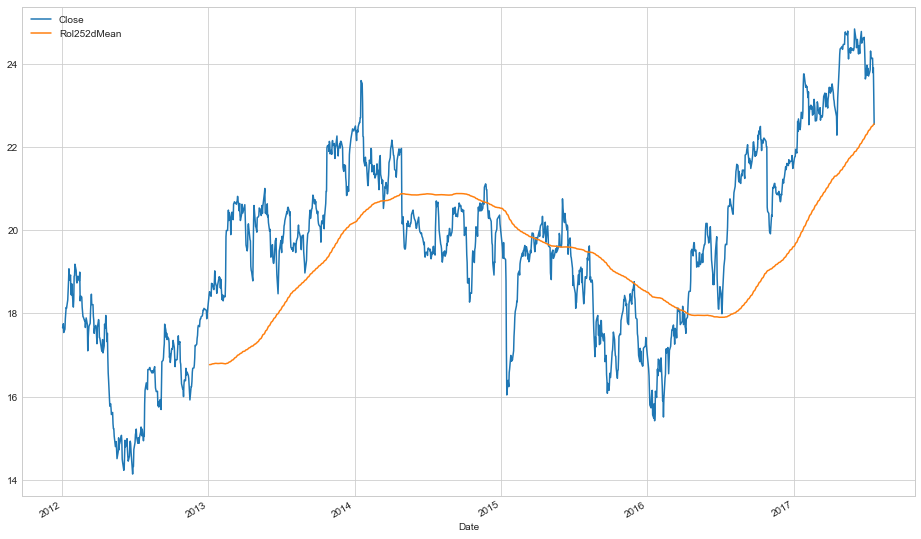

In [73]:
abb[['Close', 'Rol252dMean']].plot(figsize=(16, 10));

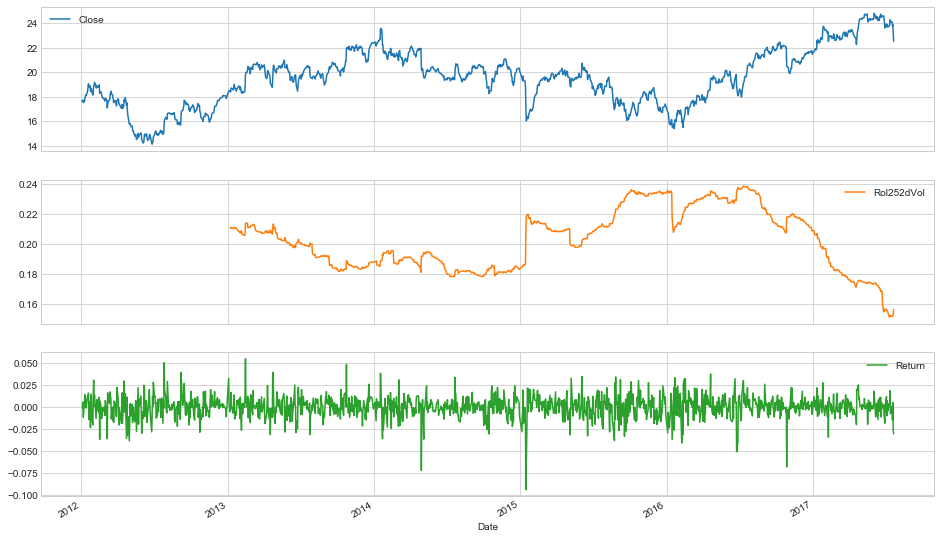

In [74]:
abb[['Close', 'Rol252dVol', 'Return']].plot(subplots=True, figsize=(16, 10));

Let's check if the returns follow a normal distribution. We have many approaches to check this, both with plots and statistics. Below are some options presented. We will make use of the `stats` sublibrary of the `scipy` package.

In [75]:
# Select returns
rets = abb['Return'].dropna()

# Calc skewness (Norm.dist: 0)
print('Skewness:', sp.stats.skew(rets))

# Calc kurtosis (Norm.dist: 3); for excess kurt set 'fisher=False'
print('Kurtosis: ', sp.stats.kurtosis(rets, fisher=False))

Skewness: -0.5934548936901249
Kurtosis:  7.703713116158396


Often the Shapiro Wilk test is used to check if values follow a normal distribution. The function `sp.stats.shapiro()`  tests the null hypothesis that the data was drawn from a normal distribution. **If the p-value is very small, it means it is unlikely that the data came from a normal distribution.**

In [76]:
# Apply Shapiro-Wilk test
print('Shapiro Wilk Test:')
print('Test Statistic: ', sp.stats.shapiro(rets)[0])
print('p-Value:        ', sp.stats.shapiro(rets)[1])

Shapiro Wilk Test:
Test Statistic:  0.9554131627082825
p-Value:         3.535358628941703e-20


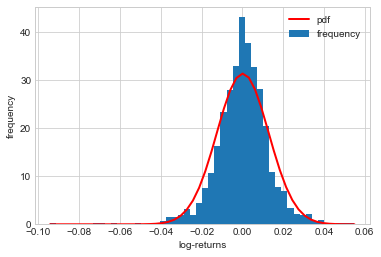

In [77]:
# Plot the log-returns with a normal distribution
plt.hist(rets, bins=50, density=True, label='frequency')
plt.xlabel('log-returns')
plt.ylabel('frequency')
x = np.linspace(np.min(rets), np.max(rets))
plt.plot(x, sp.stats.norm.pdf(x, loc=np.mean(rets), scale=np.std(rets)), 
         'r', lw=2.0, label='pdf')
plt.legend();

Or alternatively we could combine the histogram with a kernel density estimation (KDE).

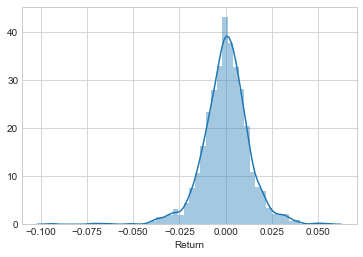

In [78]:
# KDE plot in Seaborn
sns.distplot(rets);

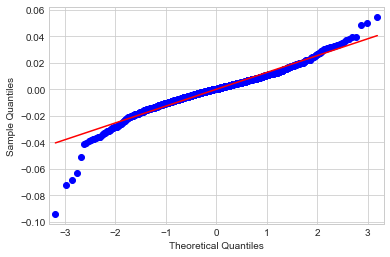

In [79]:
# qqplot
sm.qqplot(rets, line='s');

## Further Resources

In writing this notebook, many ressources were consulted. For internet ressources the links are provided within the textflow above and will therefore not be listed again. Beyond these links, the following ressources are recommended as further reading on the discussed topic:

* Vanderplas, Jake, 2016, *Python Data Science Handbook* (O'Reilly Media, Sebastopol, CA).
* Hilpisch, Yves, 2015, *Python for Finance* (O'Rilly Media, Sebastopol, CA).
* McKinney, Wes, 20123, *Python for Data Analysis* (O'Rilly Media, Sebastopol, CA).
* Sheppard, Kevin, 2017, Introduction to Python for Econometrics, Statistics and Data Analysis from Website https://www.kevinsheppard.com/images/b/b3/Python_introduction-2016.pdf, 07/07/2017.